## Lession 7
# Updating Content from a GPX file

In [1]:
from arcgis.gis import GIS
gis = GIS("home")
print("Logged in as " + gis.properties.user.username + " to " + gis.properties.name)

Logged in as ryan_cooper@eagle.co.nz to ArcGIS Enterprise


### Import Content Manager

In [44]:
# import the Content Manager class in gis module
from arcgis.gis import ContentManager

# define ContentManager
cm = ContentManager(gis)

### Cloning Data

In [ ]:
# Item Added From Toolbar
# Title: Hazards RJC | Type: Feature Service | Owner: ryan_cooper@eagle.co.nz
item = gis.content.get("c829aa91596a4b729555493c2c0d96fc")
item

In [49]:
myClone = cm.clone_items([item])

In [55]:
myClone[0].update(item_properties={'title':'Hazards KXK'})

True

### Explore the hazards layer

<Item title:"Hazards RJC" type:Feature Layer Collection owner:ryan_cooper@eagle.co.nz>
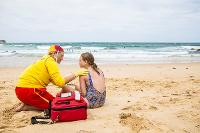

In [11]:
# Item Added From Toolbar
# Title: Hazards RJC | Type: Feature Service | Owner: ryan_cooper@eagle.co.nz
item = gis.content.get("c829aa91596a4b729555493c2c0d96fc")
item

In [3]:
myMap = gis.map("New Zealand", zoomlevel=5)
myMap

MapView(layout=Layout(height='400px', width='100%'), zoom=5.0)

### Add layer to map

In [37]:
myMap.add_layer(item)

### Delete the existing data in our Hazards layer

In [36]:
# query the layer - how many features are in there?
featureSet = layer.query()
featureSet

<FeatureSet> 4 features

In [39]:
layer.delete_features(where="oid > 0")

{'deleteResults': [{'objectId': 5, 'success': True},
  {'objectId': 6, 'success': True},
  {'objectId': 7, 'success': True},
  {'objectId': 8, 'success': True},
  {'objectId': 9, 'success': True},
  {'objectId': 10, 'success': True}]}

In [16]:
from lxml import etree

NSMAP = {"gpx": "http://www.topografix.com/GPX/1/1"}
tree = etree.parse('/arcgis/home/hazard1.gpx')

for elem in tree.findall("gpx:wpt", namespaces=NSMAP):
     print (elem.attrib['lon'], elem.attrib['lat'])

176.90224286800003 -39.47177446499995
174.75417583700005 -36.70882088899998


In [27]:
myFeatures

[{'geometry': {'x': '176.90224286800003', 'y': '-39.47177446499995'},
  'attributes': {'oid': 1}},
 {'geometry': {'x': '174.75417583700005', 'y': '-36.70882088899998'},
  'attributes': {'oid': 1}}]

In [38]:
# create an empty list that will contain the info for all our features that we are going to update
myFeatures = []
n = 1

for elem in tree.findall("gpx:wpt", namespaces=NSMAP):
    
    # create empty dictionaries that we will store our Attributes and Geometry in.
    myAttributes = {}
    myGeometry = {}

    # confirm the object id
    myAttributes['ObjectID'] = 0

    # confirm the location data
    myGeometry['x'] = float(elem.attrib['lon'])
    myGeometry['y'] = float(elem.attrib['lat'])
        
    newFeature = {"geometry": myGeometry, "attributes": myAttributes}
    myFeatures.append(newFeature)
    
layer.edit_features(adds=myFeatures)  

{'addResults': [{'objectId': 9, 'success': True},
  {'objectId': 10, 'success': True}],
 'updateResults': [],
 'deleteResults': [],
 'attachments': {'addResults': [], 'updateResults': [], 'deleteResults': []}}

### Check the items tags

In [63]:
item.tags

['Tags']

In [61]:
item.update(item_properties={'tags':'Tags, I Love Python'})

True

<Item title:"SampleWorldCities" type:Map Image Layer owner:portaladmin>